In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm
import seaborn as sns
sns.set_style("whitegrid")

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time
import random


# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import GridSearchCV

import mlflow
mlflow.end_run()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Démarrer un nouvel experiment
mlflow.start_run()

<ActiveRun: >

In [3]:
# Charger les données
file_path = "../../data/Loan_Data_Preprocessed.csv"
df = pd.read_csv(file_path)

In [4]:
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_to_income_ratio
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,0.059818
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,0.068253
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,0.126021
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,0.020481


In [5]:
#  Séparer les features et la cible
X = df.drop(columns=['customer_id', 'default'])  # Exclure l'ID client et la cible
y = df['default']

# Définition de variables
X_noms = X.columns

# Conversion en np.ndarray
X = np.array(X)
y = np.array(y)

# Définition de variables
dim = len(X[0])
nb_labels = len(np.unique(y))

In [6]:
# -----
# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42)
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y,100)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label


index = random.sample(range(len(X)),7000)
data_cv, label_cv = X[index], y[index]

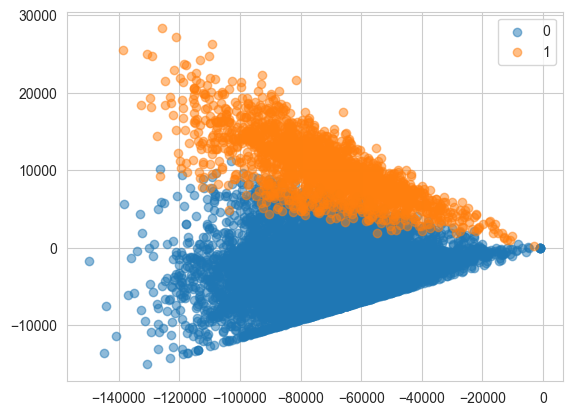

In [7]:
# A réaliser :

# 1) calcul des vecteurs propres
lam_train, V_train = np.linalg.eig(X.T @ X)
# lam_test, V_test = np.linalg.eig(XTu.T @ XTu)

# Trouver les indices des deux plus grandes valeurs propres
largest_indices = np.argsort(lam_train)[::-1][:2]



# Extraire les deux plus grandes valeurs propres et leurs vecteurs propres correspondants
largest_eigenvalues = lam_train[largest_indices]


max_train = V_train[:, largest_indices]
# max_test = V_test[:, np.argmax(lam_test)]


# 2) affichage (print)
#print("1er valeur rendue:\n", lam_train)
#print("2e valeur rendue :\n", V_train)

# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
#print("Vecteur train :\n", max_train)

# 4) affichage (plot) avec un code couleur pour les classes
for i in np.unique(y) :
  one_train = X[y==i]
  #print(one_train)

  projected_data_train = np.dot(one_train, max_train)

  plt.scatter(projected_data_train[:,0], projected_data_train[:,1],alpha=.5)


# ####################################
plt.legend(np.arange(10))

#plt.savefig("out/proj_usps_all.png",bbox_inches='tight', transparent=True,pad_inches=0)



# Perceptron de Rosenblatt

In [8]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine pour tester

# -----
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = classif.ClassifierPerceptron(dim,learning_rate=learning_rate)

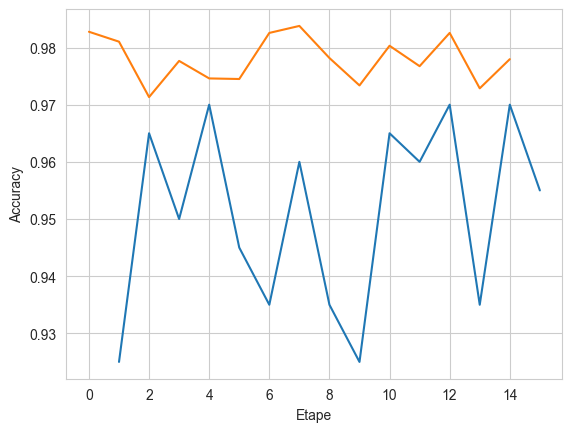

Accuracy finale (train):  0.955
Accuracy finale (test) :  0.9779591836734693


In [9]:
# -----
# Apprentissage pas à pas du perceptron et mémorisation de l'accuracy à chaque étape:
# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []

# Réalisation de N itérations
N = 15
for i in range(N) : 
    L_train = perceptron.train(data_train, label_train)
    train_acc.append(perceptron.accuracy(data_train, label_train))
    
    L_test = perceptron.train(data_test, label_test)
    test_acc.append(perceptron.accuracy(data_test, label_test))

# -----
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()


print("Accuracy finale (train): ", train_acc[len(train_acc)-1])
print("Accuracy finale (test) : ", test_acc[len(test_acc)-1])


Nb iterations réalisées:  100


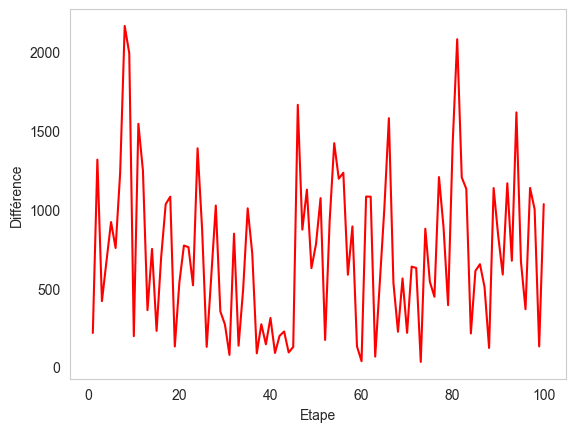

Les variations : [np.float64(216.2513328469017), np.float64(1316.5619044265516), np.float64(418.237534250863), np.float64(672.3405574307752), np.float64(920.1963592240879), np.float64(755.539416093061), np.float64(1231.9292788897449), np.float64(2165.409901511336), np.float64(1991.847032815046), np.float64(195.80506667891964), np.float64(1543.9986193228508), np.float64(1247.473057549725), np.float64(360.84068846287204), np.float64(749.8880883581968), np.float64(229.21066285552547), np.float64(695.9145586150747), np.float64(1033.9773147681778), np.float64(1081.200749757642), np.float64(130.27071795309828), np.float64(535.7343281090639), np.float64(771.2545165773707), np.float64(760.7399673401163), np.float64(518.5664666133151), np.float64(1388.4175472017607), np.float64(872.4380617285545), np.float64(127.85040068523332), np.float64(573.6738224051646), np.float64(1025.197651903816), np.float64(352.3050981340475), np.float64(270.75262765575), np.float64(76.64838765145139), np.float64(846.

In [10]:
# Apprentissage du perceptron jusqu'à convergence
les_variations = perceptron.train(data_train, label_train)
print("Nb iterations réalisées: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations, color="red")  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.grid()
plt.show()

#L_train = perceptron2.train(data_train, label_train)
L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))


Nb iterations:  1000


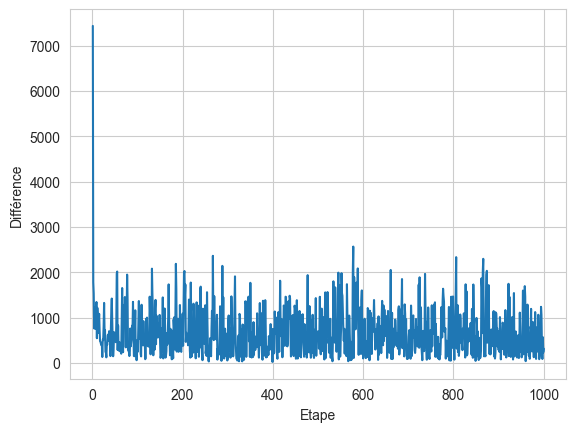

Les variations : [np.float64(7438.117356549536), np.float64(1782.5905276899045), np.float64(1532.0685169806545), np.float64(762.8576581923868), np.float64(1222.7728111746012), np.float64(844.0821771477662), np.float64(752.0498069190369), np.float64(1154.710741089212), np.float64(1346.7009743242108), np.float64(547.5380216606378), np.float64(1218.311187260556), np.float64(1016.4356217765667), np.float64(664.4491619058401), np.float64(869.3731293212943), np.float64(1084.547307081243), np.float64(731.7503172598243), np.float64(480.4769620933399), np.float64(468.0998910336268), np.float64(423.9898779478017), np.float64(392.9636941928045), np.float64(426.150758777052), np.float64(133.43083516939072), np.float64(516.9231890241892), np.float64(505.4304131278047), np.float64(826.9633827810438), np.float64(1326.187380863099), np.float64(692.8508601610818), np.float64(723.9568806597521), np.float64(245.96105532193408), np.float64(232.9555827752309), np.float64(125.5433439408747), np.float64(422.

In [11]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42) 
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y, 500)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000)
print("Nb iterations: ", len(les_variations))


# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))

Nb iterations:  1000


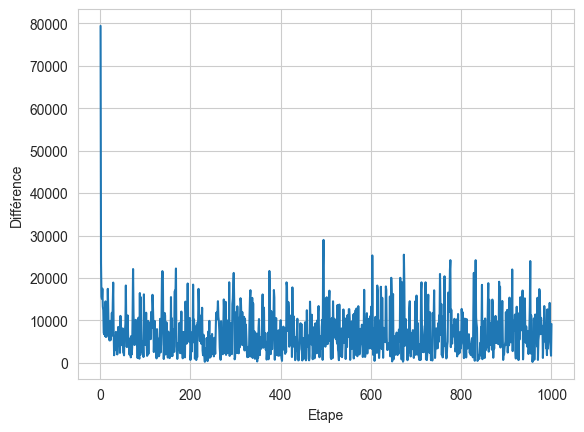

Accuracy finale (train):  0.952
Accuracy finale (test) :  0.9844444444444445


In [12]:
# Par exemple : 

# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42) 
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y, 500)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.1
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000,seuil=1E-6)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test) )


In [13]:
print("------ affichage validation croisée")

#################################

# ce qui se passe:
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(perceptron, (data_cv, label_cv), 10)
toc= time.time()

print("------ fin affichage validation croisée")

print("Validation croisée sur pen_dataset :")
print("Perf obtenues : ",res_all)
print(f'Accuracy moyenne: {res_moy:0.3f}\técart type: {res_sd:0.4f}')
print(f'Résultat en {(toc-tic):0.4f} secondes.')

------ affichage validation croisée
Itération 0  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9771428571428571
Itération 1  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9585714285714285
Itération 2  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9857142857142858
Itération 3  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9871428571428571
Itération 4  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.97
Itération 5  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9885714285714285
Itération 6  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9385714285714286
Itération 7  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9728571428571429
Itération 8  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9757142857142858
Itération 9  : taille base app.= 6300  tai